<a href="https://colab.research.google.com/github/mvince33/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
- Michael Vincent

## Part 1

In [1]:
import pandas as pd
path = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Part 2

In [2]:
# Get the dimensions of the data set
df.shape

print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 8523 rows and 12 columns.


In [3]:
# Find the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Check for duplicates
df.duplicated().sum()

print(f"There are {df.duplicated().sum()} duplicates in the data set.")

There are 0 duplicates in the data set.


In [5]:
# Look for null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> We see that 'Item_Weght' and 'Outlet_Size' have missing values.

In [6]:
# Dropping the columns with missing data would likely result in a loss of good information so we will keep the columns.
# We would also potentially lose good information by dropping rows with missing data.

# For item weight we will fill the missing entries with the average value of that column.
avg_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(avg_weight, inplace=True)

# Confirm there are no missing values in the 'Item_Weight' column.
df['Item_Weight'].isna().sum()

0

In [7]:
# We will try to make an association between 'Outlet_Size' and 'Item_Outlet_Sales'
# as a predictor for the missing values of 'Outlet_Size'.
cols = ['Outlet_Size', 'Item_Outlet_Sales']
filter_small = df['Outlet_Size'] == 'Small'
filter_medium = df['Outlet_Size'] == 'Medium'
filter_high = df['Outlet_Size'] == 'High'

print(df.loc[filter_small, cols].describe())
print(df.loc[filter_medium, cols].describe())
print(df.loc[filter_high, cols].describe())

# While it seems reasonable to associate sales with 'Small'. It does not
# seem reasonable to associate sales with 'Medium' or 'High' due to overlap in values.

       Item_Outlet_Sales
count        2388.000000
mean         1912.149161
std          1582.370364
min            33.955800
25%           601.050950
50%          1544.656000
75%          2824.323600
max          9779.936200
       Item_Outlet_Sales
count        2793.000000
mean         2681.603542
std          1855.210528
min            69.243200
25%          1270.346400
50%          2251.069800
75%          3691.195200
max         13086.964800
       Item_Outlet_Sales
count         932.000000
mean         2298.995256
std          1533.531664
min            73.238000
25%          1072.603800
50%          2050.664000
75%          3166.378350
max         10256.649000


In [8]:
# Perhaps there's an association between 'Outlet_Size' and 'Outlet_Identifier'.
print(df.loc[filter_small, ['Outlet_Size', 'Outlet_Identifier']].value_counts())
print(df.loc[filter_medium, ['Outlet_Size', 'Outlet_Identifier']].value_counts())
print(df.loc[filter_high, ['Outlet_Size', 'Outlet_Identifier']].value_counts())

print(df['Outlet_Identifier'].value_counts())

# This approach will not work as there does not seem to be a clear pattern between
# 'Outlet_Size' and 'Outlet_Identifier'.

Outlet_Size  Outlet_Identifier
Small        OUT035               930
             OUT046               930
             OUT019               528
dtype: int64
Outlet_Size  Outlet_Identifier
Medium       OUT027               935
             OUT049               930
             OUT018               928
dtype: int64
Outlet_Size  Outlet_Identifier
High         OUT013               932
dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


The above analyses did not lead us to any conclusions, but they are included to illustrate how I was thinkning about this issue.

In [9]:
# The above attempts to find a relationship between 'Outlet_Size' and
# other features did not bear fruit, so we will fill the missing values 
# the most common value.

print(df['Outlet_Size'].value_counts())

# I initially filled the missing values with 'Medium.'
# I switched to 'Missing' as that seems to be better
# practice in data science.
df['Outlet_Size'].fillna('Missing', inplace=True)

# Confirm the missing values have been filled.
df['Outlet_Size']
df['Outlet_Size'].isna().sum()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


0

In [10]:
# We now search for inconsistent labels in our data
# Use nunique to identify potntially problematic features.
df.nunique()

# Check 'Item_Fat_Content
df['Item_Fat_Content'].value_counts()
# It is reasonable to assume 'Low Fat', 'LF', and 'low fat' are 
# all the same category.
df['Item_Fat_Content'].replace(['Low Fat', 'LF', 'low fat', 'reg'], 
                               ['Low_Fat', 'Low_Fat', 'Low_Fat', 'Regular'],
                               inplace=True)

# Confirm the name changes
df['Item_Fat_Content'].value_counts()

Low_Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
# Continue looking for inconsistent labels
print(df.nunique())
print()

# Check the remaining features
df['Item_Type'].value_counts()
df['Outlet_Identifier'].value_counts()
df['Outlet_Establishment_Year'].value_counts()
df['Outlet_Location_Type'].value_counts()
df['Outlet_Type'].value_counts()

# 'Item_Fat_Content' was the only column we 
# found with inconsistent labels.

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64



Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
# Find the summary statistics of the numeric data.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Part 3

In [13]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



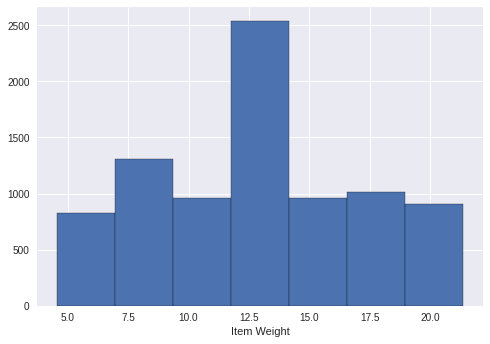

In [14]:
# Construct histograms of the quantitative data
# Redisplay the features 
df.info()
print()
plt.style.use('seaborn');
plt.xlabel('Item Weight');
df['Item_Weight'].hist(bins = 7, edgecolor = 'black')


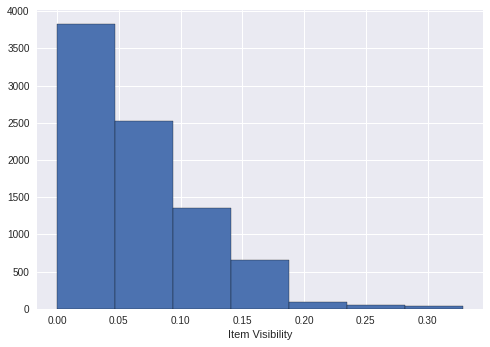

In [15]:
plt.xlabel('Item Visibility');
df['Item_Visibility'].hist(bins = 7, edgecolor = 'black');

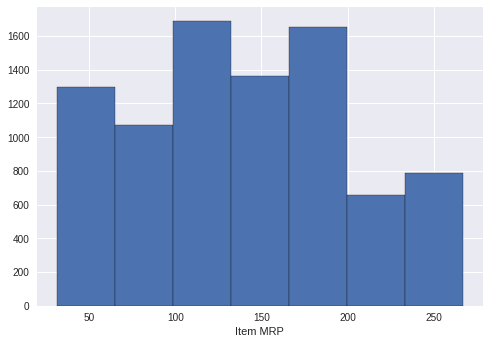

In [16]:
plt.xlabel('Item MRP');
df['Item_MRP'].hist(bins = 7, edgecolor = 'black');

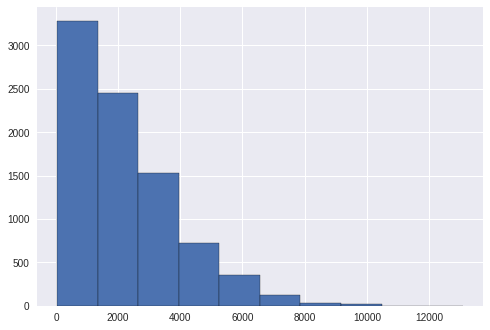

In [17]:
# We skip 'Outlet Establishment Year' as its histogram
# is not very revealing
df['Item_Outlet_Sales'].hist(bins = 10, edgecolor = 'black');

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



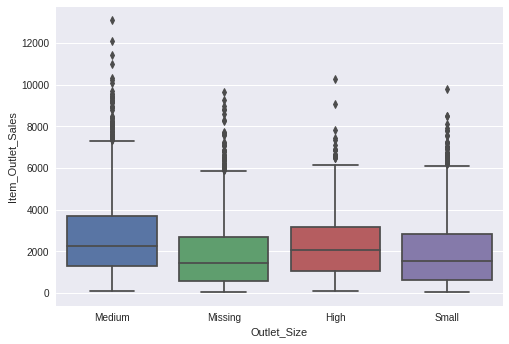

In [18]:
# Construct boxplots for the variables involving the Outlets
df.info()
print()

# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Size'
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df);

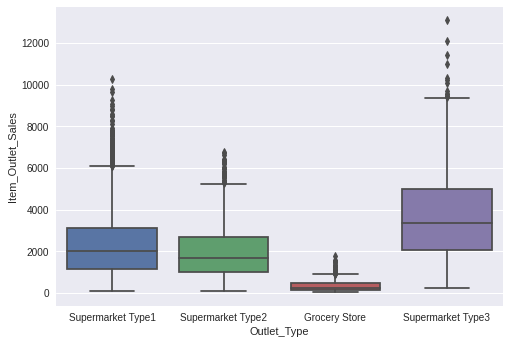

In [19]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet_Type'.
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df);

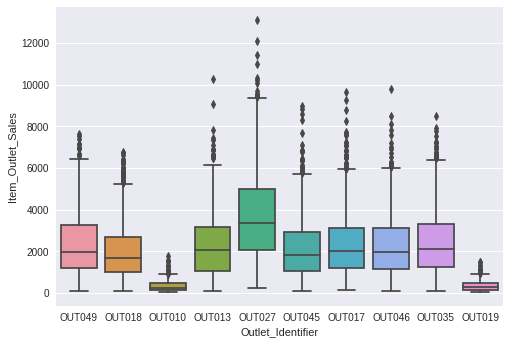

In [20]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Identifier'.
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = df);

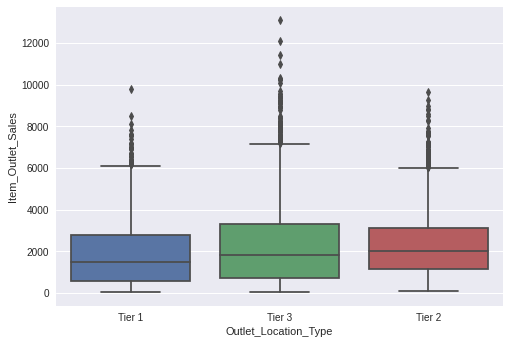

In [21]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Location Type'
sns.boxplot(x = 'Outlet_Location_Type', y= 'Item_Outlet_Sales', data = df);

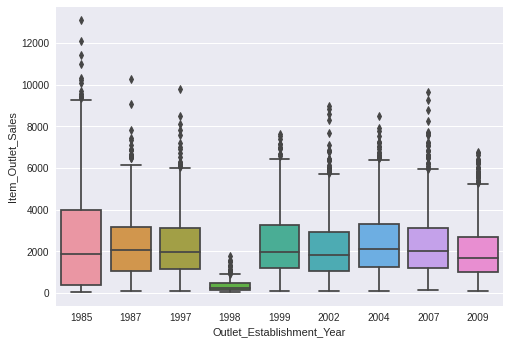

In [22]:
# Make boxplots for 'Item Outlet Sales' vs. 'Outlet Establishment Year'.
sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Item_Identifier              1559
Item_Weigh

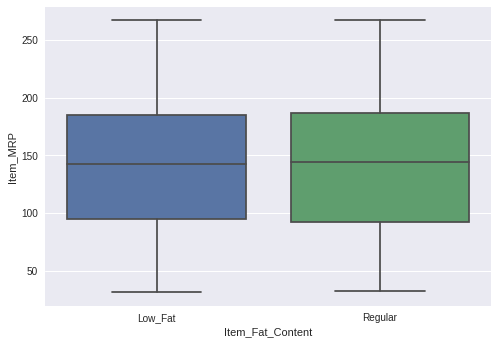

In [23]:
# Make boxplots for the "Item" variables
df.info()
print()
print(df.nunique())

# Make a boxplot for 'Item MRP' vs. 'Item Fat Content'.
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_MRP', data = df);

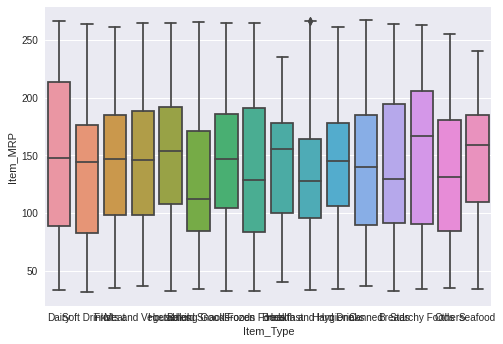

In [24]:
# Make boxplots for 'Item MRP' vs. 'Item Type'.
sns.boxplot(x = 'Item_Type', y = 'Item_MRP', data = df);


We don't like the labels on the above boxplot so we take the time to construct a prettier boxplot.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


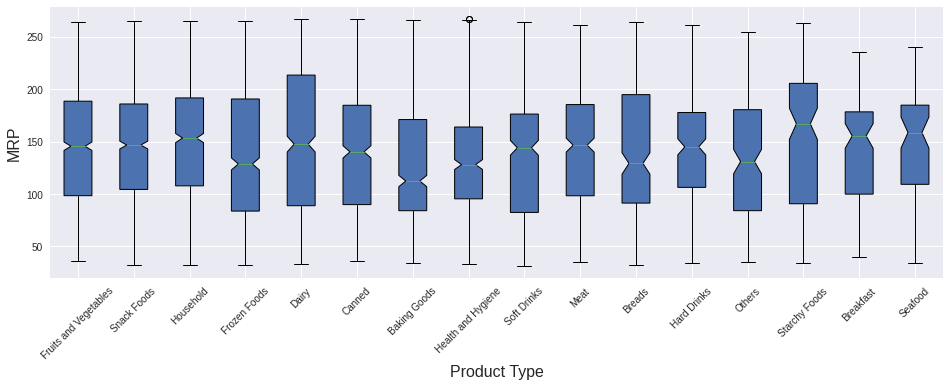

In [25]:
# Since the labels are overlapping on the above boxplot we
# will take the time to construct a prettier set of boxplots.

# Get the values to construct boxplots of
food_types = df['Item_Type'].value_counts().index
mrp = [df.loc[df['Item_Type'] == item_type, 'Item_MRP'] for item_type in food_types]

# Construct the boxplots
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5));
boxplots = axes.boxplot(mrp,
                        labels = food_types,
                        patch_artist = True,
                        notch = True);
plt.xticks(rotation = 45);
plt.xlabel('Product Type', fontsize = 16);
plt.ylabel('MRP', fontsize = 16);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


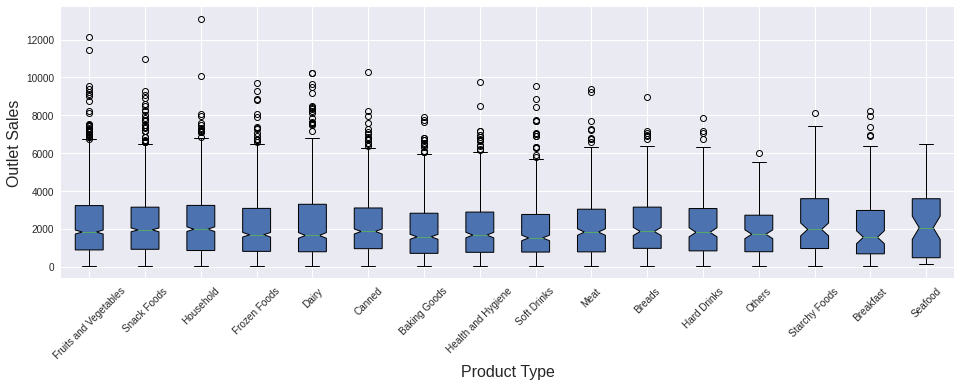

In [26]:
# Construct boxplots for 'Item Type' with the y-axis as 'Item Outlet Sales'.

outlet_sales_by_type = [df.loc[df['Item_Type'] == item_type, 'Item_Outlet_Sales'] for item_type in food_types]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 5));
boxplots = axes.boxplot(outlet_sales_by_type,
                        labels = food_types,
                        patch_artist = True,
                        notch = True);
plt.xticks(rotation = 45);
plt.xlabel('Product Type', fontsize = 16);
plt.ylabel('Outlet Sales', fontsize = 16);

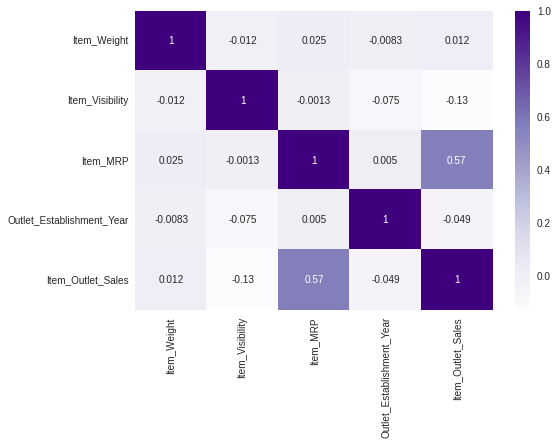

In [27]:
# Construct the heatmap
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);

## Part 4

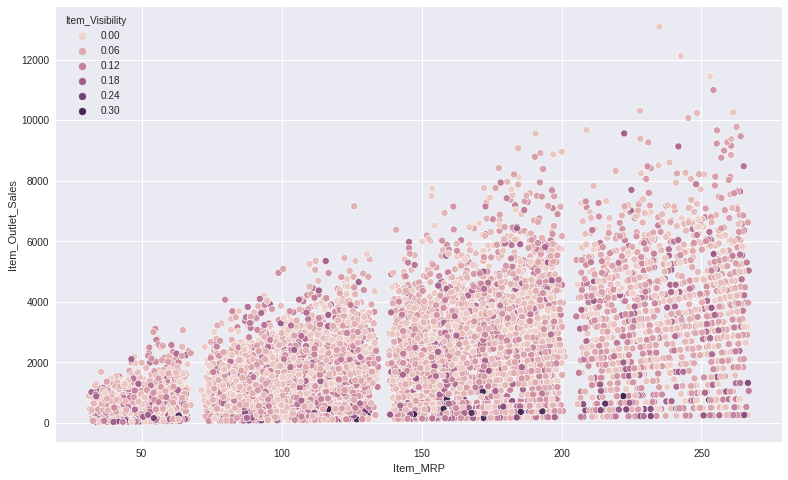

In [28]:
# Create a scatter plot of 'Item_Outlet_Sales' vs. 'Item_MRP'.

plt.figure(figsize = (13, 8));
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'], hue = df['Item_Visibility']);

The above scatterplot shows us there is a positive correlation between 'Item_MRP' (manufacturer's retail price?) and sales, where a higher MRP correlates with higher sales. Some caution should be used here as high MRP does not guarantee high sales. The converse is true though. High sales correspond with high MRPs. 

We also used hue to represent the item's visibility. Darker hues correspond with higher visibility, and lighter hues correspond with lower visibility. As we can see on the graph, higher visibility does not correlate with higher sales. Indeed, the highest sales correspond with lower visibilities.



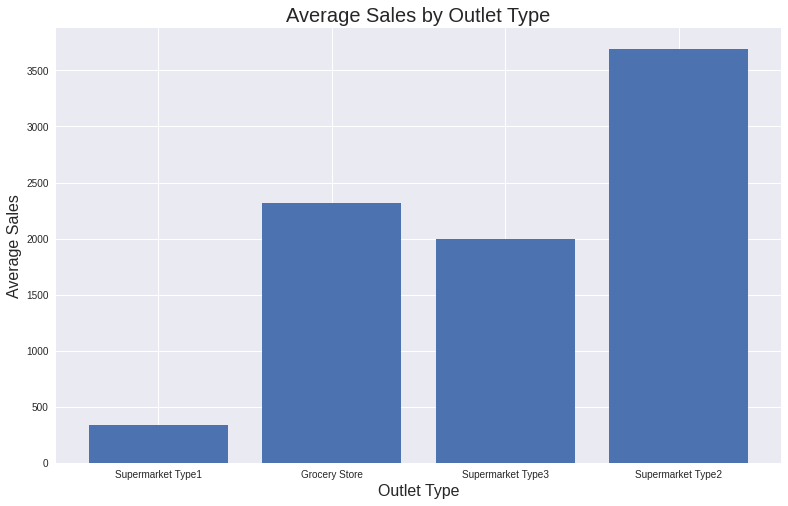

In [37]:
# Construct a bar graph for average sales by outlet type.

# Get the counts of each outlet type
outlet_counts = df['Outlet_Type'].value_counts()
# Get the average sales of each outlet type
cum_sales_by_outlet = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum() / outlet_counts

# Plot average sales by outlet type
plt.figure(figsize = (13, 8));
plt.bar(df['Outlet_Type'].value_counts().index, cum_sales_by_outlet);
plt.xlabel('Outlet Type', fontsize = 16);
plt.ylabel('Average Sales', fontsize = 16);
plt.title('Average Sales by Outlet Type', fontsize = 20);

This chart shows us that "Supermarket Type2" is the highest performing outlet type, followed by "Grocery Store." The outlet type "Supermarket Type 1" performs very poorly since its average sales are significantly lower than the outher outlet types. 